In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
#!pip install yfinance
import yfinance as yf # https://pypi.org/project/yfinance/
import math
import random
import seaborn as sns
import datetime
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
# get data by ticker-name, start-time & end-time
def get_df_data(ticker_name="AAPL", start_time="2022-01-01", end_time="2022-10-09"):
  df_data = yf.download(tickers=ticker_name, start=start_time, end=end_time) 
  df_data = df_data[ ["Open", "High", "Low", "Close", "Volume"] ]
  df_data['previous_Close'] = df_data['Close'].shift(1)
  df_data['daily_return'] = (df_data['Close']-df_data['previous_Close'])/df_data['previous_Close']
  return df_data

def search_by_index(df_data, index_time):
  tmp_list = list(df_data.index)
  i = 0
  for t in tmp_list:
    if t>=index_time:
      break
    i += 1
  return i-1

def merge_stocks(df_data1, df_data2):
  data = []
  for i in range(len(df_data1)):
        # get the info of target stock on current business day
    index1 = df_data1.index[i] 
    it1 = df_data1.iloc[i]    
    open1, high1, low1, close1 = it1['Open'], it1['High'], it1['Low'], it1['Close']
    daily_return1 = it1['daily_return']
    volume1 = it1['Volume']
        # get the info of reference stock on previous business day
    j = search_by_index(df_data2, index1)
    index2 = df_data2.index[j] 
    it2 = df_data2.iloc[j]    
    open2, high2, low2, close2 = it2['Open'], it2['High'], it2['Low'], it2['Close']
    daily_return2 = it2['daily_return']
    volume2 = it2['Volume']

    if index1>index2:
      tmp_list = [ index1, open1, high1, low1, close1, index2, open2, high2, low2, close2 ]
      data.append( tmp_list )
    i += 1
  col_names = ['target_time', 'target_open', 'target_high', 'target_low', 'target_close',
                'ref_time', 'ref_open', 'ref_high', 'ref_low', 'ref_close']
  df = pd.DataFrame(data, columns = col_names)
  return df

def LR(x, y):
  k, b, R, p, std_err = stats.linregress(x, y) # R*R -> R2
  print( '\tlinear model: y = ', round(k, 4), '* x + ', round(b, 4), "\t R2:", round(R*R, 4), "\t std error:", round(std_err, 3) )
  mymodel = []
  for v in x:
    mymodel.append( k*v + b )
  assert len(y)==len(mymodel)
  print( "\tdata numbers (x & y): ", len(y), len(mymodel) )
  return k, b, R, std_err, mymodel

def move_down(old_list, offset_y=2):
  new_list = []
  for v in old_list:
    new_list.append(v-offset_y)
  return new_list

def lists_dif(y1, y2):
    dif_list = []
    i = 0
    while i<len(y1):
        v = y1[i] - y2[i]
        if v<0:
            v = -v
        dif_list.append( v )
        i += 1
    df = pd.DataFrame(dif_list, columns = ['model_error'])
    return df

def printing01(label, num):
    print( label, "\t", round(num, 2) )
    return

time range:	 2022-09-01 - 2023-02-28
[*********************100%***********************]  1 of 1 completed
target stock:	 9988.HK 	 104
[*********************100%***********************]  1 of 1 completed
reference stock:	 BABA 	 106
model info:
	ref_time 	 2022-09-01 00:00:00 	 2023-02-02 00:00:00
	target_time 	 2022-09-02 00:00:00 	 2023-02-03 00:00:00
open
	linear model: y =  0.9824 * x +  -0.2033 	 R2: 0.977 	 std error: 0.015
	data numbers (x & y):  103 103
	model_error max 	 8.79
	model_error min 	 0.01
	model_error mean 	 1.7
	model_error median 	 1.42
	model_error std 	 1.48
	model_error 10% 	 0.26
	model_error 25% 	 0.72
	model_error 50% 	 1.42
	model_error 75% 	 2.11
	model_error 90% 	 3.41
	error_gap:  2.11
	 open ref:  112.5 	 open target predicted:  110.32


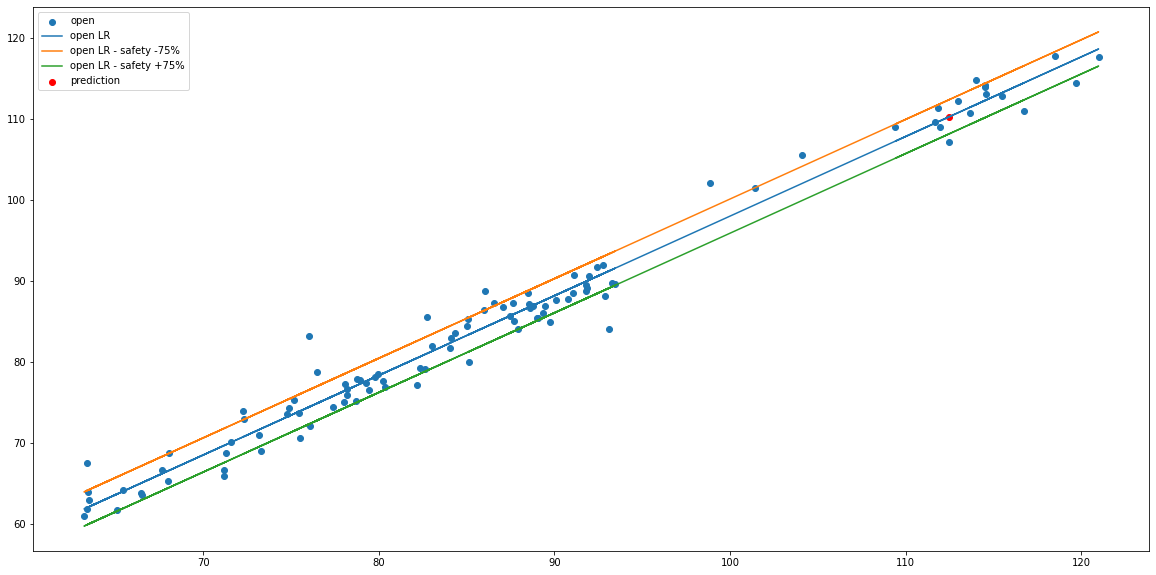

high
	linear model: y =  0.9643 * x +  1.6232 	 R2: 0.9771 	 std error: 0.015
	data numbers (x & y):  103 103
	model_error max 	 10.09
	model_error min 	 0.01
	model_error mean 	 1.63
	model_error median 	 1.28
	model_error std 	 1.5
	model_error 10% 	 0.33
	model_error 25% 	 0.61
	model_error 50% 	 1.28
	model_error 75% 	 2.25
	model_error 90% 	 2.79
	error_gap:  2.25
	 high ref:  112.53 	 high target predicted:  110.13


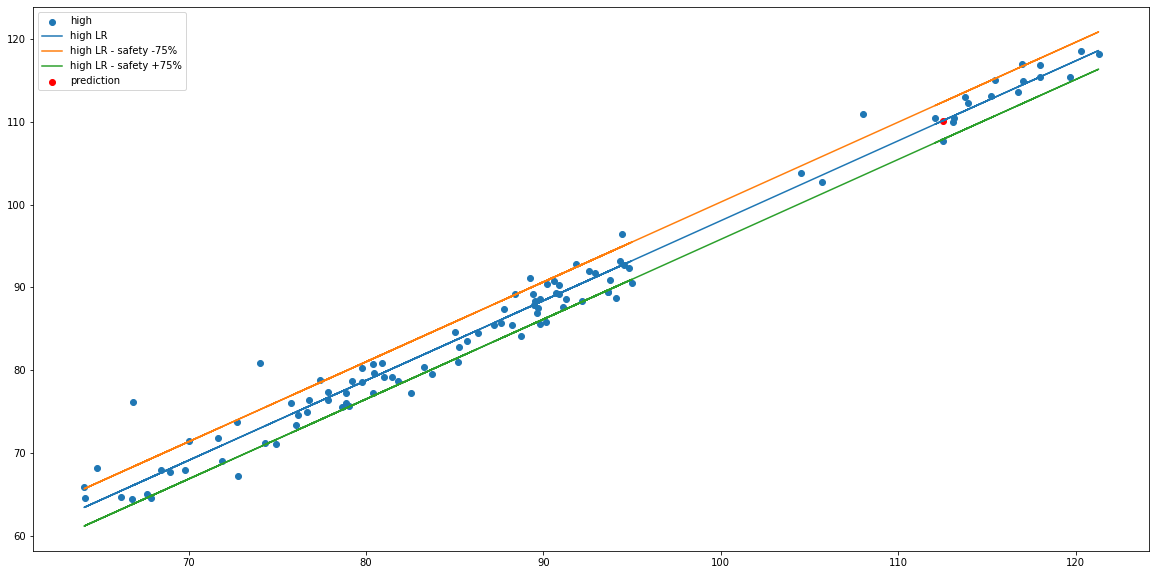

low
	linear model: y =  0.9759 * x +  0.3118 	 R2: 0.9841 	 std error: 0.012
	data numbers (x & y):  103 103
	model_error max 	 7.3
	model_error min 	 0.01
	model_error mean 	 1.29
	model_error median 	 0.89
	model_error std 	 1.32
	model_error 10% 	 0.15
	model_error 25% 	 0.39
	model_error 50% 	 0.89
	model_error 75% 	 1.78
	model_error 90% 	 2.92
	error_gap:  1.78
	 low ref:  107.81 	 low target predicted:  105.53


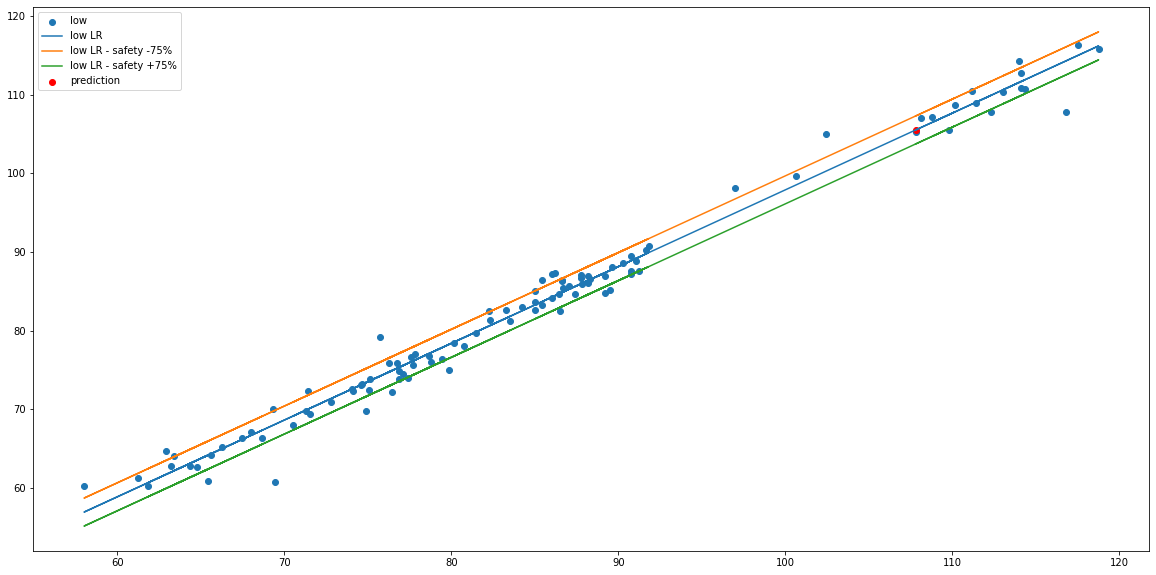

close
	linear model: y =  0.9637 * x +  1.4226 	 R2: 0.9735 	 std error: 0.016
	data numbers (x & y):  103 103
	model_error max 	 9.34
	model_error min 	 0.02
	model_error mean 	 1.74
	model_error median 	 1.34
	model_error std 	 1.66
	model_error 10% 	 0.31
	model_error 25% 	 0.76
	model_error 50% 	 1.34
	model_error 75% 	 2.18
	model_error 90% 	 3.13
	error_gap:  2.18
	 close ref:  109.74 	 close target predicted:  107.18


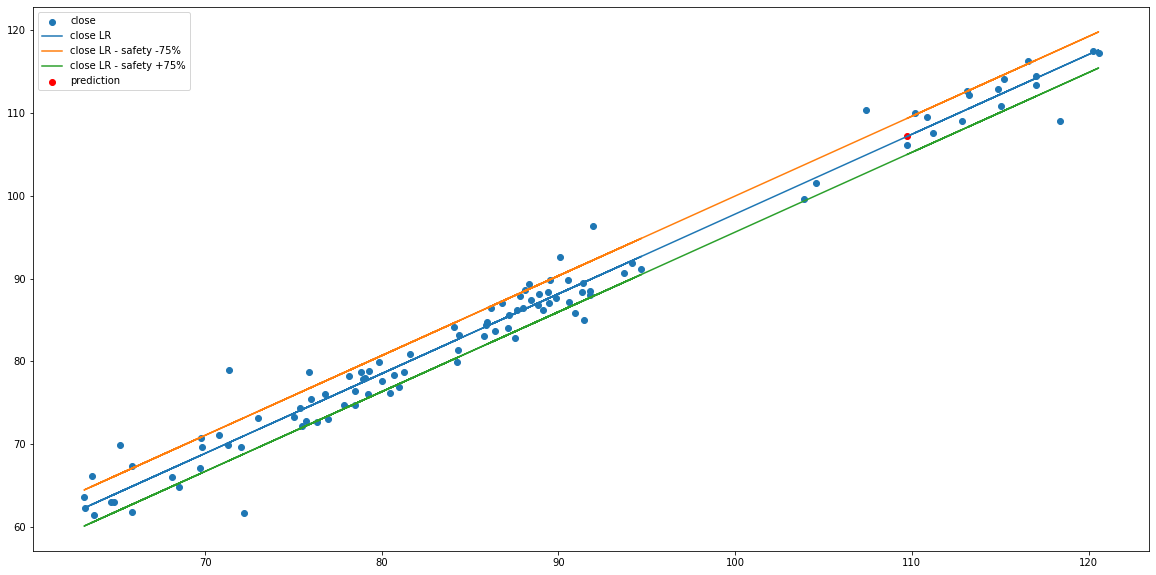

In [90]:
stocks_info = [
    ('BABA', '9988.HK', '2022-11-01', 1),
    ('BIDU', '9888.HK', '2022-10-25', 1),
    ('JD', '9618.HK', '2022-10-24', 0.5 * 7.8),
    ('MPNGY', '3690.HK', '2022-10-24', 0.5 * 7.8),
    ('NTES', '9999.HK', '2022-10-26', 0.2 * 7.8),
    ('LI', '2015.HK', '2022-10-26', 0.5 * 7.8),
    ('NIO', '9866.HK', '2022-10-26', 1 * 7.8)
]

stocks_info = [ ('BABA', '9988.HK', '2022-11-01', 1) ]

for it in stocks_info[:]:
    # get market data of target-stock & reference-stock
    reference_stock, target_stock, st, ratio = it
    st, et = "2022-09-01", "2023-02-28"
    print("time range:\t", st, "-", et)
    df_data1 = get_df_data(ticker_name=target_stock, start_time=st, end_time=et)
    print("target stock:\t", target_stock, "\t", len(df_data1))
    df_data2 = get_df_data(ticker_name=reference_stock, start_time=st, end_time=et)
    print("reference stock:\t", reference_stock, "\t", len(df_data2))

    # target stock (datetime, open, high, low, close), 1-day previous reference stock (datetime, open, high, low, close) 
    merged_data = merge_stocks(df_data1, df_data2)
    print('model info:')
    print( "\tref_time \t", list(merged_data['ref_time'])[0], "\t", list(merged_data['ref_time'])[-1] )
    print( "\ttarget_time \t", list(merged_data['target_time'])[0], "\t", list(merged_data['target_time'])[-1] )
    
    models_parameters = {}
    
  # Linear regression to fit data of target-stock & reference-stock
    for label_name in ["open", "high", "low", "close"]:
        print( label_name )
          # model info
        x, y = list(merged_data['ref_' + label_name]), list(merged_data['target_'+label_name])
        k, b, R, std_err, mymodel = LR(x, y)
        models_parameters[label_name] = [k, b, R*R] # record model parameters
        error_df = lists_dif(y, mymodel)
        printing01('\tmodel_error '+'max', error_df['model_error'].max())
        printing01('\tmodel_error '+'min', error_df['model_error'].min())
        printing01('\tmodel_error '+'mean', error_df['model_error'].mean())
        printing01('\tmodel_error '+'median', error_df['model_error'].median())
        printing01('\tmodel_error '+'std', error_df['model_error'].std())
        printing01('\tmodel_error '+'10%', error_df['model_error'].quantile(0.1))
        printing01('\tmodel_error '+'25%', error_df['model_error'].quantile(0.25))
        printing01('\tmodel_error '+'50%', error_df['model_error'].quantile(0.5))
        printing01('\tmodel_error '+'75%', error_df['model_error'].quantile(0.75))
        printing01('\tmodel_error '+'90%', error_df['model_error'].quantile(0.9))
          # data visualization
        plt.subplots(figsize=(20, 10))
        plt.scatter(x, y, label=label_name) # points
        plt.plot(x, mymodel, label=label_name+" LR") # model
          # error range
        error_gap = list(merged_data['target_'+label_name])[-1] * 1.0 * 0.01 # 1% error
        error_gap = round(error_gap, 2)
        for percentile in [75]: # 10, 25, 50, 75, 
            error_gap = error_df['model_error'].quantile( round(percentile/100.0, 2) )
            error_gap = round(error_gap, 2)
            print( "\terror_gap: ", error_gap )
            plt.plot(x, move_down(mymodel,-error_gap), label=label_name+" LR - safety -"+str(percentile)+"%")
            plt.plot(x, move_down(mymodel,+error_gap), label=label_name+" LR - safety +"+str(percentile)+"%")
          # predict today point
        ref_it = df_data2.iloc[-1]
        ref_dic = {"high":ref_it['High'], "low":ref_it['Low'], "open":ref_it['Open'], "close":ref_it['Close']}
        pred_x =  round(ref_dic[label_name], 2)
        pred_y = k*pred_x+b
        print( "\t", label_name+" ref: ", pred_x, "\t", label_name+" target predicted: ", round(pred_y, 2) )
        plt.scatter([pred_x], [pred_y], label="prediction", color ="red")
        plt.legend()
        plt.show()
        

In [107]:

models_parameters

for label_name in ["open", "high", "low", "close"]:
    k, b, r2 = models_parameters[label_name]
    merged_data[label_name+"_pred"] = merged_data["ref_"+label_name]*k + b
    merged_data[label_name+"_dif"] = merged_data["target_"+label_name] - merged_data[label_name+"_pred"]
    print(label_name)
    printing01('\tpred_error '+'10%', merged_data[label_name+'_dif'].quantile(0.1))
    printing01('\tpred_error '+'25%', merged_data[label_name+'_dif'].quantile(0.25))
    printing01('\tpred_error '+'50%', merged_data[label_name+'_dif'].quantile(0.5))
    printing01('\tpred_error '+'75%', merged_data[label_name+'_dif'].quantile(0.75))
    printing01('\tpred_error '+'90%', merged_data[label_name+'_dif'].quantile(0.9))

open
	pred_error 10% 	 -2.86
	pred_error 25% 	 -1.32
	pred_error 50% 	 -0.16
	pred_error 75% 	 1.42
	pred_error 90% 	 2.2
high
	pred_error 10% 	 -2.51
	pred_error 25% 	 -1.59
	pred_error 50% 	 -0.28
	pred_error 75% 	 1.1
	pred_error 90% 	 2.33
low
	pred_error 10% 	 -1.93
	pred_error 25% 	 -0.86
	pred_error 50% 	 -0.05
	pred_error 75% 	 0.89
	pred_error 90% 	 2.01
close
	pred_error 10% 	 -2.44
	pred_error 25% 	 -1.35
	pred_error 50% 	 -0.21
	pred_error 75% 	 1.33
	pred_error 90% 	 2.36


In [131]:
def in_range(range1, range2, num):
    if num<=range1 and num>=range2:
        return 1
    return 0

def in_range_update(range1, range2, nums):
    tmp = []
    for v in nums:
        tmp.append( in_range(range1, range2, v) )
    return tmp


pred_df = merged_data[ ['target_time', 'ref_time', 'open_dif', 'high_dif', 'low_dif', 'close_dif'] ]
tmp_df = pred_df.copy()
range1, range2 = 1.5, -1.5
for label_name in ['open_dif', 'high_dif', 'low_dif', 'close_dif']:
    tmp_df[label_name+"_hit"] = in_range_update(range1, range2, list(tmp_df[label_name]))

tmp_df['hits'] = tmp_df['open_dif_hit'] + tmp_df['high_dif_hit'] + tmp_df['low_dif_hit'] + tmp_df['close_dif_hit']
dic = {0:0, 1:0, 2:0, 3:0, 4:0}
for v in list(tmp_df['hits']):
    dic[v] += 1
dic

{0: 10, 1: 12, 2: 31, 3: 29, 4: 21}